# Pandas Cookbook

## 11장. Matplotlib, Pandas, Seaborn을 이용한 시각화 

https://github.com/PacktPublishing/Pandas-Cookbook/tree/master/data

### 소개

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### matplotlib 다뤄 보기

### matplotlib에 대한 객체지향 가이드

Text(0.5,1.03,'FIgure Title')

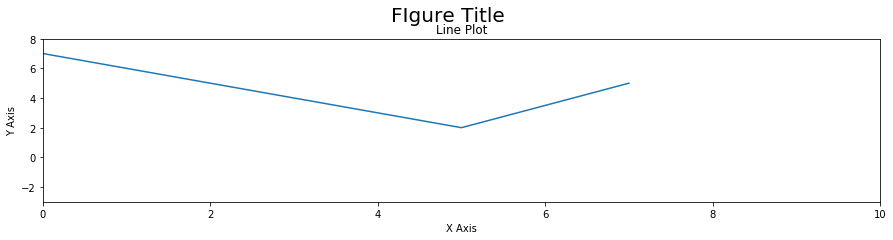

In [245]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15, 3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('FIgure Title', size =20, y =1.03) # subtitle 아님, suptitle

Text(0.5,1.03,'Figure Title')

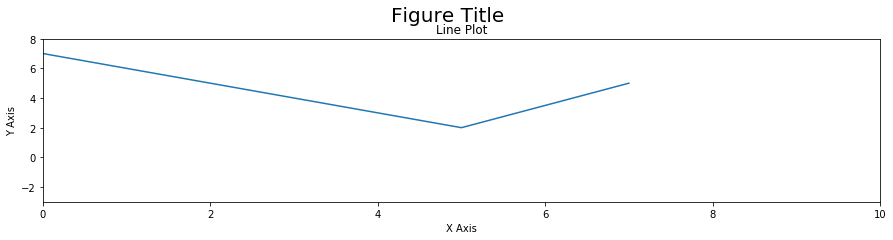

In [246]:
fig, ax = plt.subplots(figsize = (15, 3))
ax.plot(x,y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size = 20, y= 1.03)

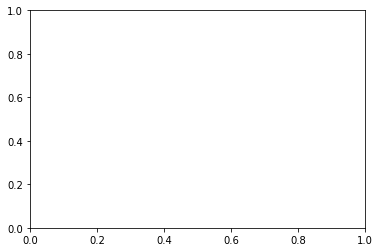

In [247]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

In [248]:
type(fig)

matplotlib.figure.Figure

In [249]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [253]:
fig.get_size_inches()

array([14.,  4.])

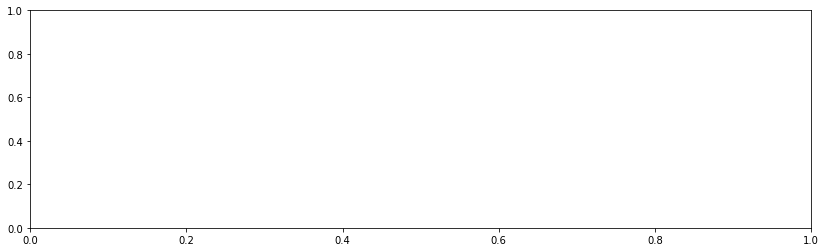

In [254]:
fig.set_size_inches(14, 4)
fig

In [255]:
fig.axes

In [256]:
fig.axes[0] is ax

True

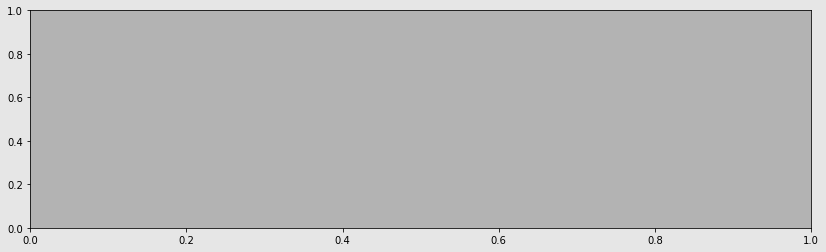

In [257]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [258]:
ax_chidren =ax.get_children()
ax_chidren

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

In [259]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x1a27477860>),
             ('right', <matplotlib.spines.Spine at 0x1a27477f98>),
             ('bottom', <matplotlib.spines.Spine at 0x1a27477e48>),
             ('top', <matplotlib.spines.Spine at 0x1a27477cc0>)])

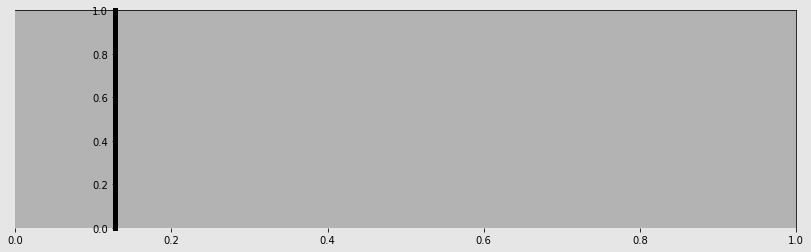

In [260]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


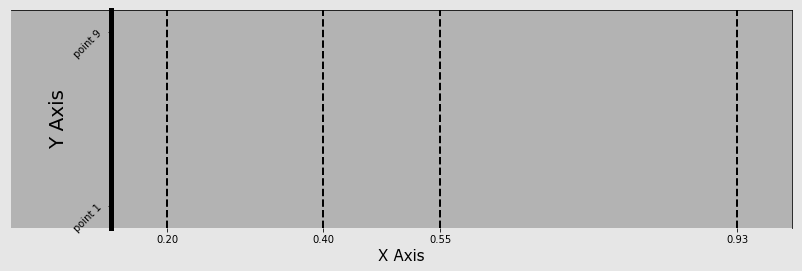

In [261]:
ax.xaxis.grid(True, which = 'major', linewidth = 2, color = 'black', linestyle = '--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family = 'Verdana', fontsize = 15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize = 20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation = 45)
fig

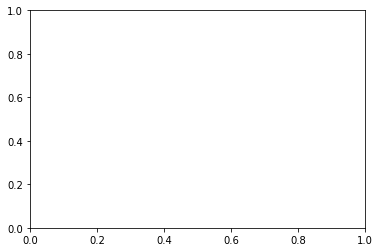

In [262]:
plot_objects = plt.subplots(nrows = 1, ncols = 1)
type(plot_objects)

fig = plot_objects[0]
ax = plot_objects[1] 

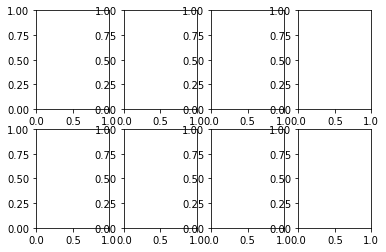

In [263]:
plot_objects = plt.subplots(2,4)

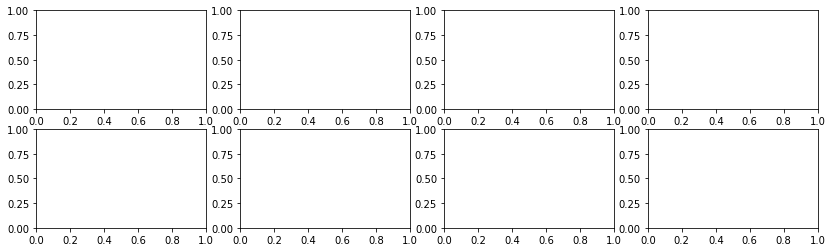

In [204]:
plot_objects = plt.subplots(2, 4, figsize=(14, 4))

In [125]:
plot_objects[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eee4748>,
      dtype=object)

In [264]:
fig.axes == fig.get_axes()

True

In [265]:
ax.xaxis == ax.get_xaxis()

True

In [266]:
ax.yaxis == ax.get_yaxis()

True

In [267]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5,3.2,''),
  Text(1,4.2,''),
 'clip_box': TransformedBbox(
     Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
     CompositeGenericTransform(
         CompositeGenericTransform(
             BboxTransformTo(
                 Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)),
             Affine2D(
                 [[1. 0. 0.]
                  [0. 1. 0.]
                  [0. 0. 1.]])),
         BboxTransformTo(
             TransformedBbox(
                 Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                 BboxTransformTo(
                     TransformedBbox(
                         Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                         Affine2D(
                             [[72.  0.  0.]
                              [ 0. 72.  0.]
                              [ 0.  0.  1.]]))))))),
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 432x2

- matplotlib 사용자 가이드 문서 : https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
- Axes 객체에 대한 모든 메서드 리스트 : https://matplotlib.org/api/axes_api.html
- 벤 루트(Ben Root)의 튜토리얼 해부 : https://www.youtube.com/watch?v=rARMKS8jE9g
- matplotlib 상태 module 모듈과 객체지향 기법의 공식문서 : https://matplotlib.org/api/pyplot_summary.html#the-pyplot-api
- Artist 튜토리얼에 대한 matplotlib 공식문서 : https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py

### matplotlib를 이용한 데이터 시각화

In [268]:
import numpy as np
import pandas as pd
pwd = %pwd

In [269]:
movie = pd.read_csv(pwd + '/movie.csv')
med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [207]:
years = med_budget.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [208]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0,0.5,'Millions of Dollars')

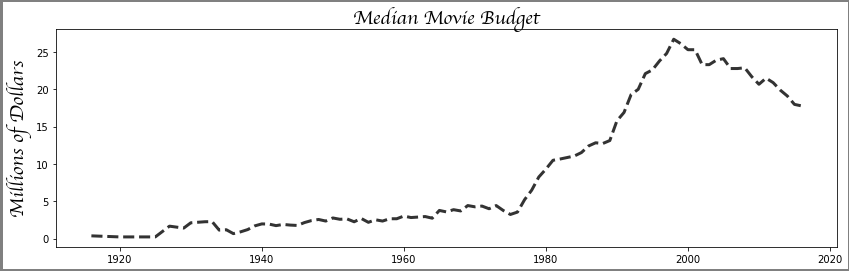

In [209]:
fig, ax = plt.subplots(figsize =(14,4), linewidth=5, edgecolor = '.5')
ax.plot(years, budget, linestyle = '--', linewidth = 3, color = '.2', label = 'All Movies')

text_kwargs = dict(fontsize = 20, family = 'cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [210]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

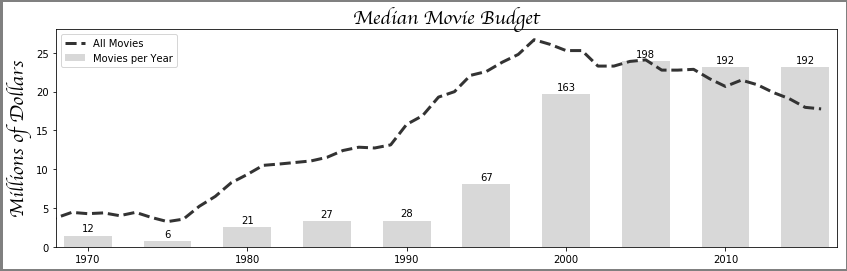

In [136]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor = '.5', alpha = .3, label = 'Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha = 'center')
ax.legend()
fig

In [270]:
top10 = movie.sort_values('budget', ascending = False).groupby('title_year')['budget'].apply(lambda x: x.iloc[:10].median() / 1e6)
top10_roll = top10.rolling(5, min_periods = 1).mean()
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

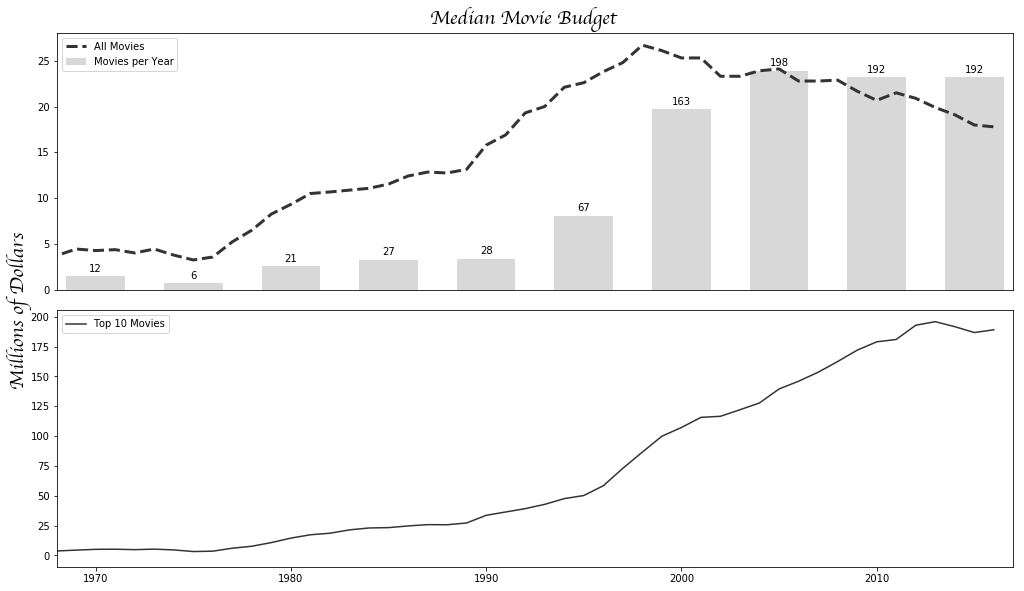

In [271]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,8), sharex = True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle = '--', linewidth = 3, color = '.2', label = 'All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor = '.5', alpha=.3, label = 'Movies per Year')

ax1.legend(loc = 'upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible = False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y +.5, str(v), ha = 'center')
    
ax2.plot(years, top10_roll.values, color = '.2', label = 'Top 10 Movies')    
ax2.legend(loc = 'upper left')

fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y = 1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation = 'vertical', ha = 'center', **text_kwargs)

import os
path = os.path.expanduser(pwd + '/movie_budget.png')
fig2.savefig(path, bbox_inches = 'tight')

In [139]:
med_budget.loc[2012:2016].mean()

17.78

In [140]:
med_budget.loc[2011:2015].mean()

17.98

In [141]:
med_budget.loc[2010:2014].mean()

19.1

In [142]:
os.path.expanduser(pwd + '/movie_budget.png')

'/Users/chosikc/Sites/PandasCookbook/movie_budget.png'

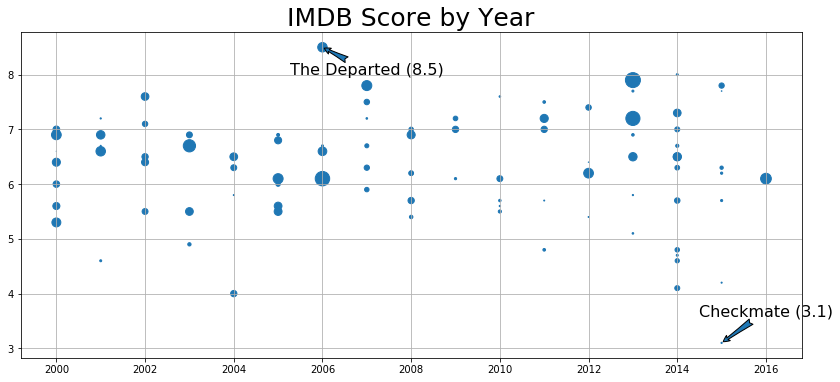

In [143]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m  = movie[cols].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000' ).sample(100)

fig, ax = plt.subplots(figsize = (14,6))
ax.scatter(x = 'title_year', y = 'imdb_score', s = 'budget2', data = movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()

for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy = (year, score), xytext = (year + 1, score + offset), s = title + ' ({})'.format(score), ha = 'center', size = 16, arrowprops = dict(arrowstyle = "fancy"))

ax.set_title('IMDB Score by Year', size = 25)
ax.grid(True)

- Legend Guide의 Matplotlib 공식문서 : https://matplotlib.org/tutorials/intermediate/legend_guide.html
- scatter 메서드의 Matplotlib 공식문서 :  https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter
- Annotaition 가이드의 Matplotlib 공식문서 : https://matplotlib.org/users/annotations.html

### Pandas를 이용한 도식화 기초

In [234]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'], 
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


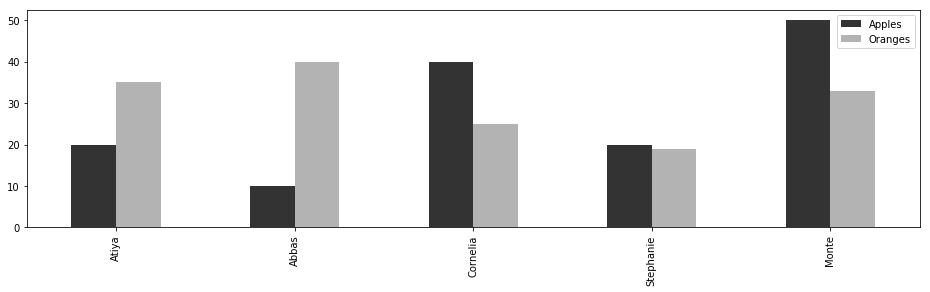

In [235]:
color = ['.2', '.7']
df.plot(kind='bar', color=color, figsize=(16,4))

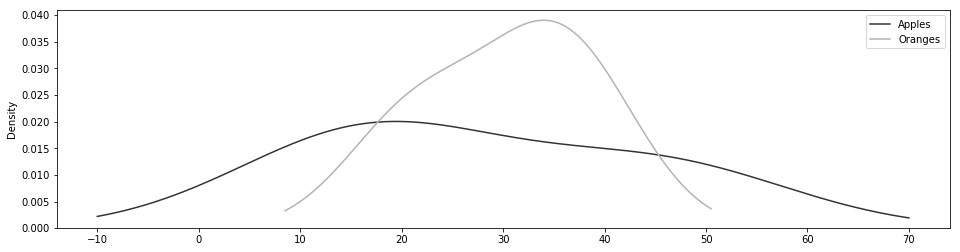

In [236]:
df.plot(kind='kde', color=color, figsize=(16,4))

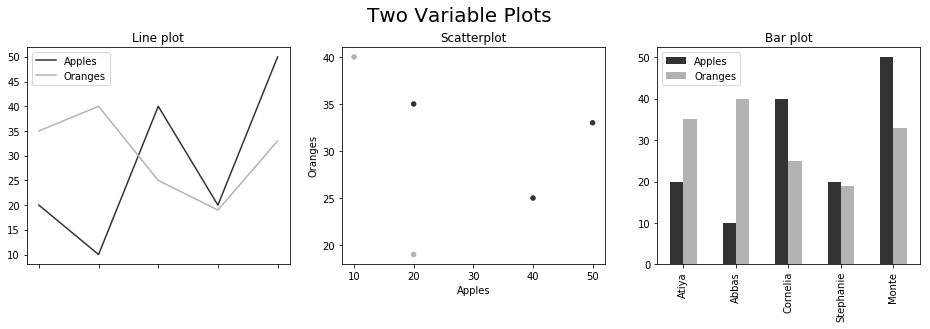

In [238]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(x='Apples', y='Oranges', kind='scatter', color=color, 
        ax=ax2, title='Scatterplot')
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

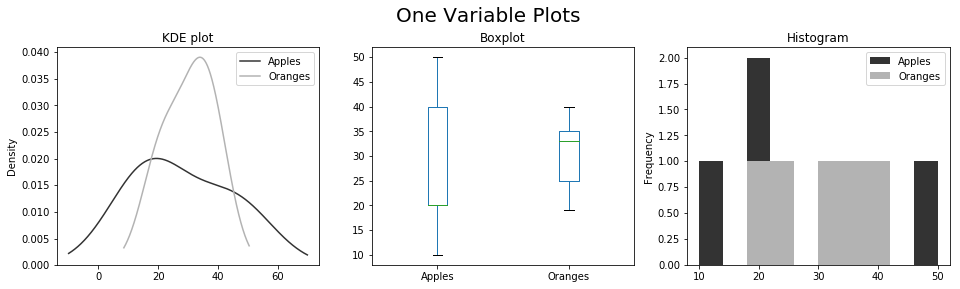

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (16, 4))
fig.suptitle('One Variable Plots', size = 20, y=1.02)
df.plot(kind = 'kde', color = color, ax= ax1, title = 'KDE plot')
df.plot(kind = 'box', ax= ax2, title = 'Boxplot')
df.plot(kind= 'hist', color = color, ax = ax3, title = 'Histogram')

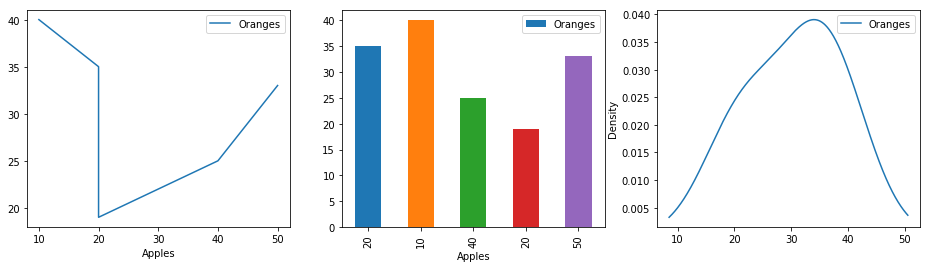

In [243]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 4))
df.sort_values('Apples').plot(x = 'Apples', y='Oranges', kind = 'line', ax= ax1)
df.plot(x = 'Apples', y = 'Oranges', kind = 'bar', ax = ax2)
df.plot(x = 'Apples', kind = 'kde', ax =ax3)

- 시각화에 대한 pandas의 공식문서 : http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 비행 데이터셋 시각화

In [150]:
flights = pd.read_csv(pwd + '/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [151]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis = 1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

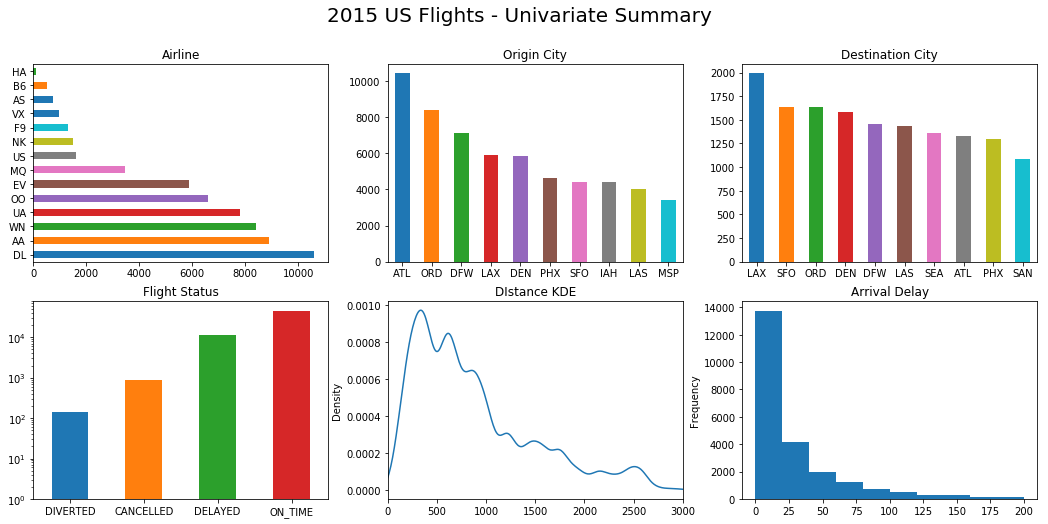

In [152]:
fig, ax_array = plt.subplots(2, 3, figsize = (18, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6)  = ax_array

fig.suptitle('2015 US Flights - Univariate Summary', size = 20)

ax = flights['AIRLINE'].value_counts()
ax.plot(kind = 'barh', ax = ax1, title= 'Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind = 'bar', ax=ax2, rot = 0, title= 'Origin City')

dv = flights['DEST_AIR'].value_counts().head(10)
dv.plot(kind = 'bar', ax = ax3, rot = 0, title = 'Destination City')

status.plot(kind = 'bar', ax = ax4, rot = 0, log = True, title = 'Flight Status')
flights['DIST'].plot(kind = 'kde', ax= ax5, xlim = (0, 3000), title= 'DIstance KDE')

flights['ARR_DELAY'].plot(kind = 'hist', ax =ax6, title= 'Arrival Delay', range = (0, 200))

In [153]:
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR = 2015, HOUR = hour, MINUTE = minute)

df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [154]:
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

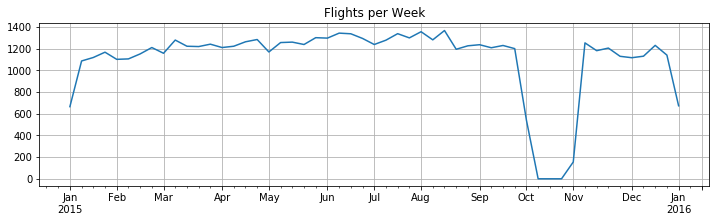

In [155]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot(figsize = (12, 3), title = 'Flights per Week', grid = True)

Text(0.5,1,'Flights per Week (Interpolated Missing Data)')

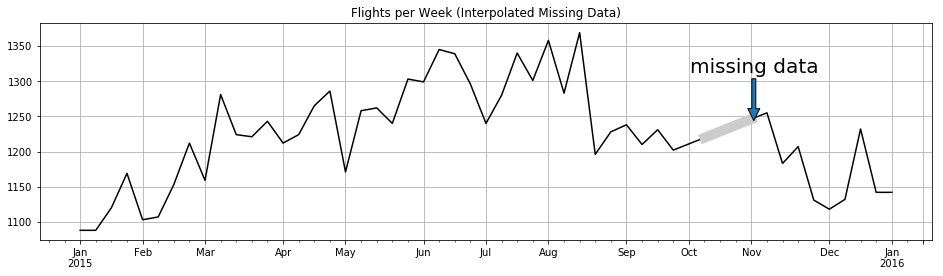

In [156]:
fc_miss = fc.where(fc > 1000)
fc_intp = fc_miss.interpolate(limit_direction = 'both')

ax = fc_intp.plot(color = 'black', figsize = (16, 4))
fc_intp[fc < 500].plot(linewidth = 10, grid = True, color = '.8', ax =ax)

ax.annotate(xy=(.8, .55), xytext=(.8, .77), xycoords = 'axes fraction', s = 'missing data', ha = 'center', size = 20, arrowprops = dict())

ax.set_title('Flights per Week (Interpolated Missing Data)')

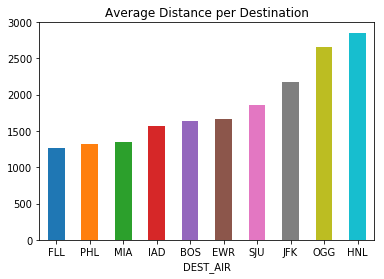

In [157]:
flights.groupby('DEST_AIR')['DIST'] \
    .agg(['mean', 'count']) \
    .query('count > 100') \
    .sort_values('mean') \
    .tail(10) \
    .plot(kind = 'bar', y = 'mean', rot = 0, legend = False, title = 'Average Distance per Destination')

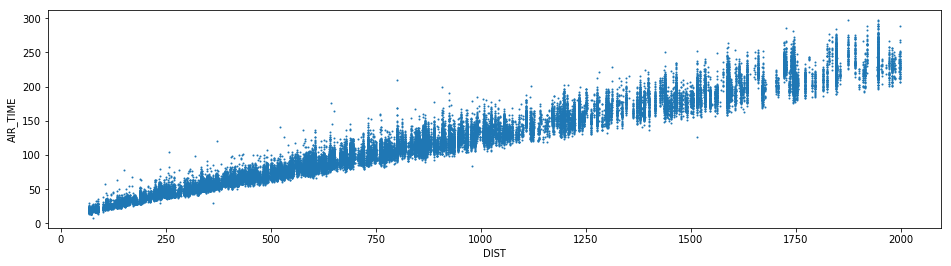

In [158]:
fs = flights.reset_index(drop = True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind = 'scatter', s=1, figsize = (16, 4))

In [159]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins = range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [160]:
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'].transform(normalize)

fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


Text(0.5,0.98,'')

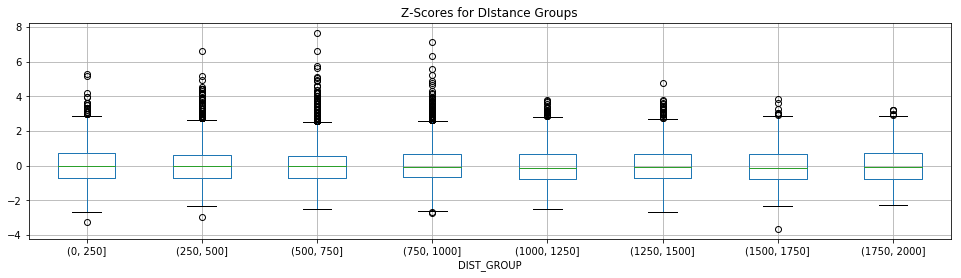

In [161]:
ax = fs.boxplot(by = 'DIST_GROUP', column = 'TIME_SCORE', figsize= (16,4))
ax.set_title('Z-Scores for DIstance Groups')
ax.figure.suptitle('')

In [162]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]
outliers = outliers[['AIRLINE', 'ORG_AIR', 'DEST_AIR', 'DIST', 'AIR_TIME', 'ARR_DELAY', 'DIVERTED']]
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)
outliers

,AIRLINE,ORG_AIR,DEST_AIR,DIST,AIR_TIME,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,373,121.0,54.0,0,1
2015-05-25 16:30:00,F9,MSP,ATL,907,199.0,79.0,0,2
2015-09-10 20:00:00,UA,IAH,MCI,643,176.0,76.0,0,3
2015-12-10 19:53:00,OO,PHX,SFO,651,164.0,146.0,0,4
2015-12-26 09:15:00,NK,ORD,DFW,802,210.0,98.0,0,5


Text(0.5,1,'Flight Time vs Distance with Outliers')

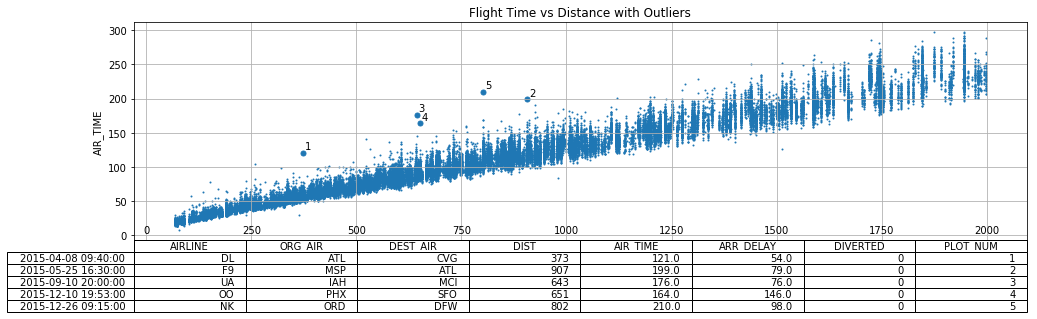

In [163]:
ax = fs.plot(x= 'DIST', y='AIR_TIME', kind= 'scatter', s=1, figsize = (16, 4), table = outliers)
outliers.plot(x='DIST', y='AIR_TIME', kind= 'scatter', s=25, ax=ax, grid = True  )
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]

for t, d, n in outs.itertuples(index = False):
    ax.text(d+5, t+5, str(n))
    
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible = False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')

- 표로 도식화하는 pandas 공식문서 : http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-tables

### 영역 그래프를 스태킹해 새로운 추세 발견

In [164]:
meetup = pd.read_csv(pwd+'/meetup_groups.csv', parse_dates=['join_date'], index_col='join_date') 
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [165]:
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [166]:
gc2 = group_count.unstack('group', fill_value= 0)
gc2.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2
2017-10-15,14,13,9,11,2


In [167]:
group_total = gc2.cumsum()
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


In [168]:
row_total = group_total.sum(axis = 'columns')
group_cum_pct = group_total.div(row_total, axis = 'index')
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


Text(0.86,0.78,'Machine Learning')

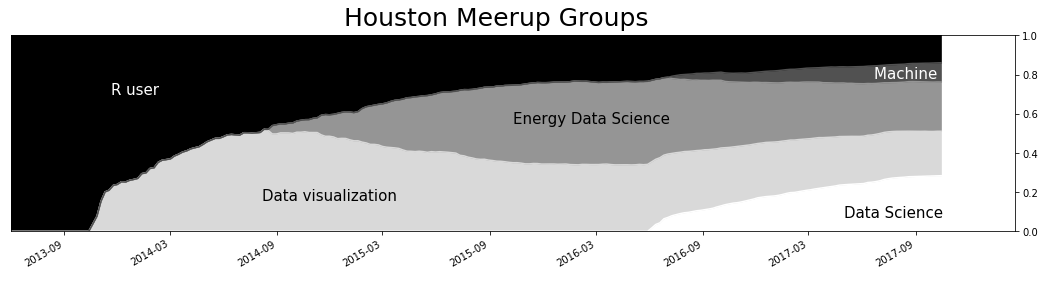

In [169]:
ax = group_cum_pct.plot(kind = 'area', figsize= (18,4), cmap = 'Greys', xlim = ('2013-6', None), ylim=(0,1), legend = False)
ax.figure.suptitle('Houston Meerup Groups', size = 25)
ax.set_xlabel(' ')
ax.yaxis.tick_right()
plot_kwargs = dict(xycoords = 'axes fraction', size = 15)
ax.annotate(xy = (.1, .7), s = 'R user', color = 'w', **plot_kwargs)
ax.annotate(xy = (.25, .16), s = 'Data visualization', color = 'k',  **plot_kwargs)
ax.annotate(xy = (.5, .55), s = 'Energy Data Science', color  = 'k',  **plot_kwargs)
ax.annotate(xy = (.83, .07), s = 'Data Science', color  = 'k',  **plot_kwargs)
ax.annotate(xy = (.86, .78), s = 'Machine Learning', color  = 'w',  **plot_kwargs)


In [170]:
pie_data = group_cum_pct.asfreq('3MS', method = 'bfill').tail(6).to_period('M').T
pie_data

join_date,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09
group,,,,,,
houston data science,0.016949,0.110375,0.171245,0.212289,0.244033,0.280162
houston data visualization,0.337827,0.306052,0.277244,0.261103,0.242085,0.230332
houston energy data science,0.416025,0.354467,0.312271,0.288859,0.267576,0.253758
houston machine learning,0.000000,0.037176,0.051969,0.071593,0.087839,0.093026
houstonr,0.229199,0.191931,0.187271,0.166156,0.158467,0.142722


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


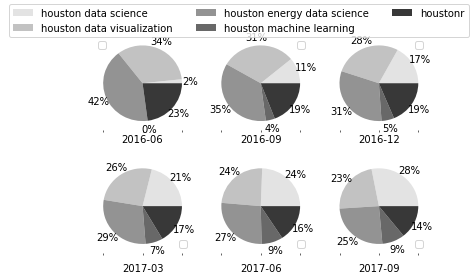

In [171]:
from matplotlib.cm import Greys
greys = Greys(np.arange(50, 250, 40))

ax_array = pie_data.plot(kind = 'pie', subplots=True, layout=(2,3), labels = None, autopct = '%1.0f%%', pctdistance = 1.22, colors = greys)

ax1 = ax_array[0, 0]
ax1.figure.legend(ax1.patches, pie_data.index, ncol = 3)

for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')
    
ax.figure.subplots_adjust(hspace = .3)

# No handles with labels found to put in legend. ???

### seaborn과 pandas의 차이점 이해

In [172]:
employee = pd.read_csv(pwd + '/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [173]:
import seaborn as sns

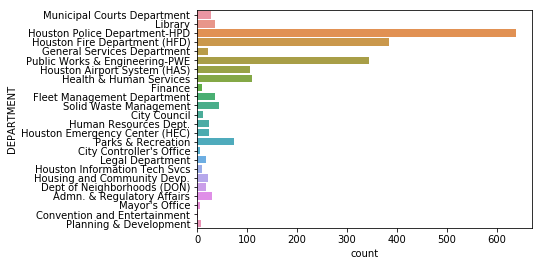

In [174]:
sns.countplot(y='DEPARTMENT', data=employee)

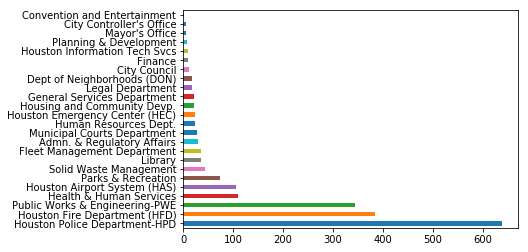

In [175]:
employee['DEPARTMENT'].value_counts().plot('barh')

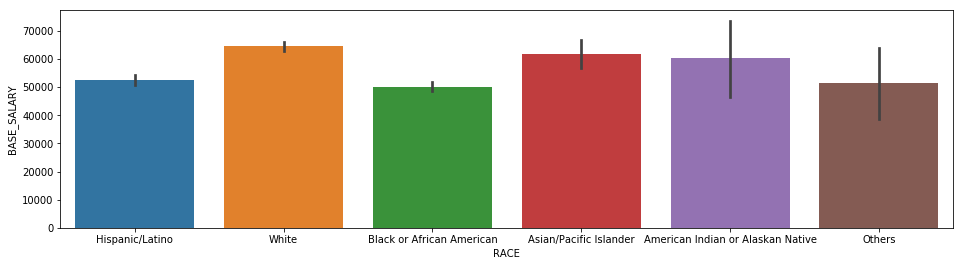

In [176]:
ax = sns.barplot(x = 'RACE', y = 'BASE_SALARY', data = employee)
ax.figure.set_size_inches(16, 4)

Text(0,0.5,'Mean Salary')

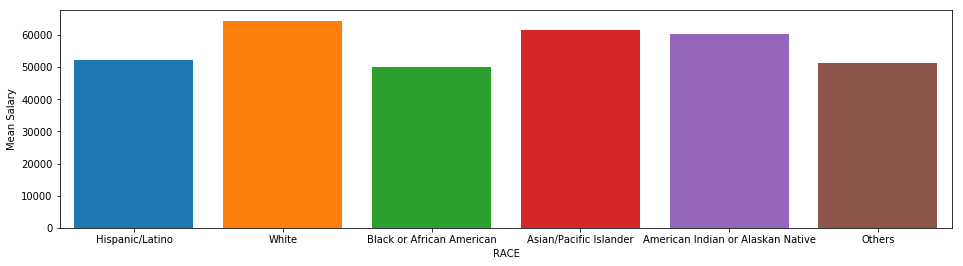

In [177]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind = 'bar', rot = 0, figsize = (16,4), width = .8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary') 

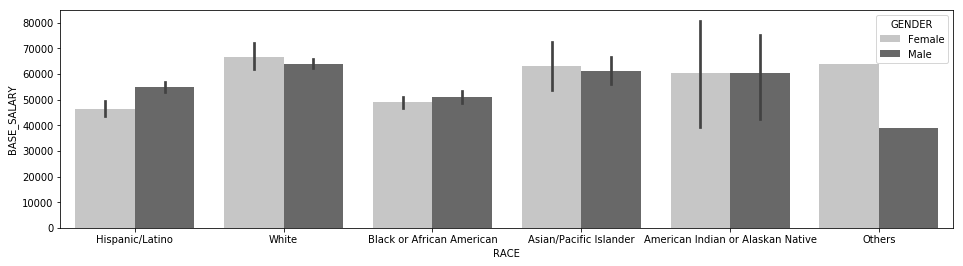

In [178]:
ax = sns.barplot(x = 'RACE', y = 'BASE_SALARY', hue = 'GENDER', data = employee, palette = 'Greys')
ax.figure.set_size_inches(16,4)

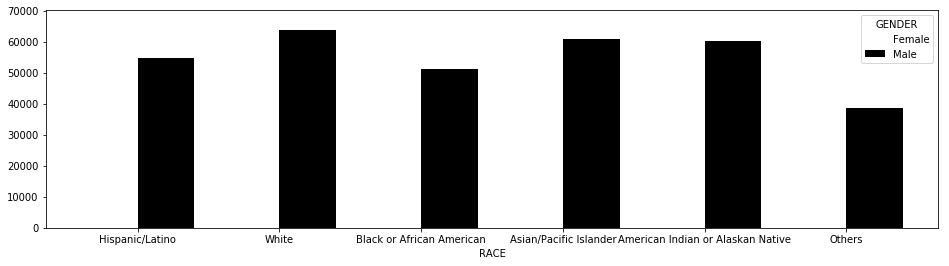

In [179]:
employee.groupby(['RACE', 'GENDER'], sort = False)['BASE_SALARY'].mean().unstack('GENDER').plot(kind = 'bar', figsize = (16, 4), rot = 0, width = .8, cmap = 'Greys')

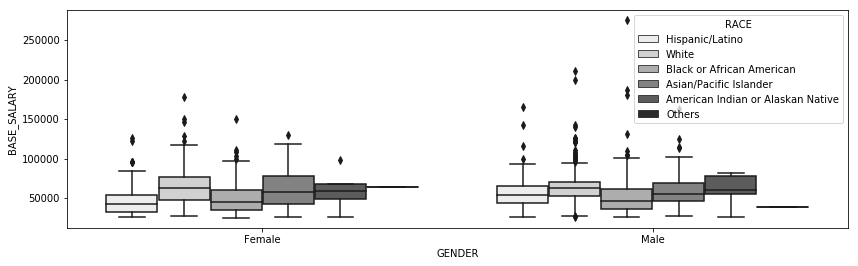

In [180]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

Text(0.5,0.98,'')

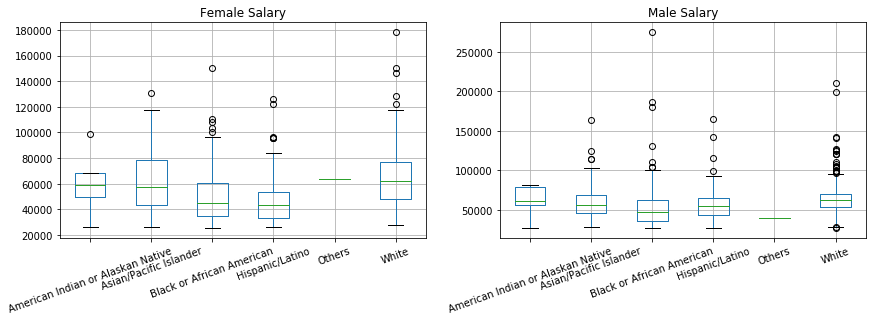

In [275]:
fig, ax_array = plt.subplots(1, 2, figsize = (14, 4), sharex= True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g').boxplot(by = 'RACE', column = 'BASE_SALARY', ax=ax, rot = 20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

Text(0.5,0.98,'')

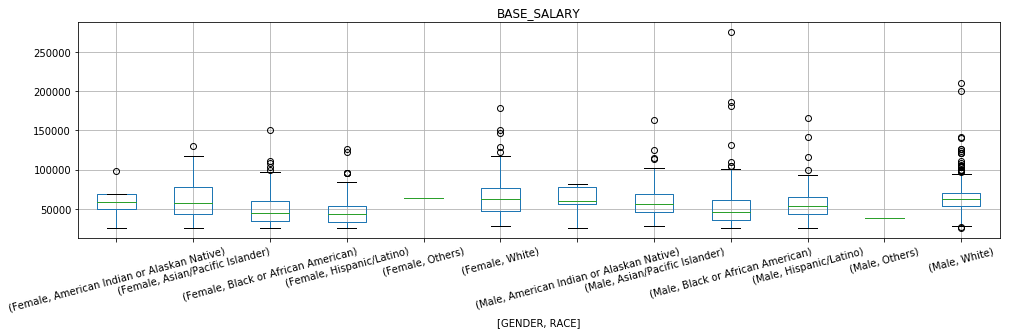

In [276]:
ax = employee.boxplot(by=['GENDER', 'RACE'], column = 'BASE_SALARY', figsize = (16, 4), rot = 15)
ax.figure.suptitle('')

- Seaborn 공식 튜토리얼 문서 : http://seaborn.pydata.org/tutorial.html
- Seanborn complete API : http://seaborn.pydata.org/api.html

### seaborn Grid를 사용한 다변량 분석

In [292]:
pwd = %pwd
employee = pd.read_csv(pwd + '/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])
days_hired = pd.to_datetime('12-1-2016') - employee['HIRE_DATE']

one_year = pd.Timedelta(1, unit = 'Y')
employee['YEARS_EXPERIENCE'] = days_hired / one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472494
1,2000-07-19,16.369946
2,2015-02-03,1.826184
3,1982-02-08,34.812488
4,1989-06-19,27.452994


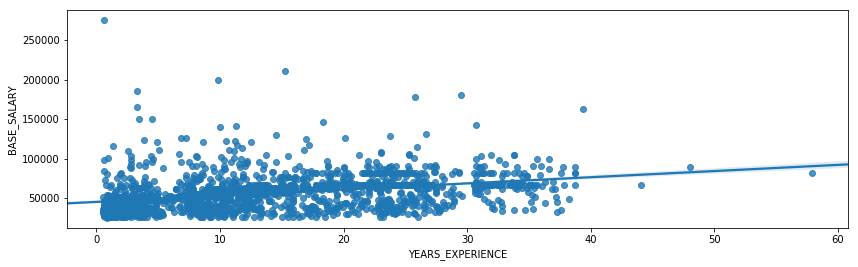

In [293]:
ax = sns.regplot(x = 'YEARS_EXPERIENCE', y = 'BASE_SALARY', data = employee)
ax.figure.set_size_inches(14, 4)

seaborn.axisgrid.FacetGrid

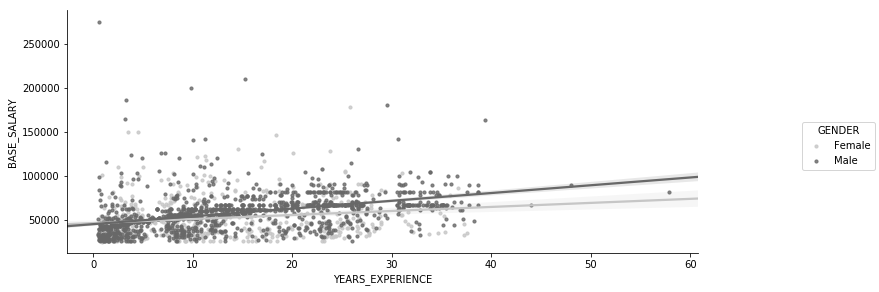

In [297]:
g = sns.lmplot('YEARS_EXPERIENCE', 'BASE_SALARY', hue = 'GENDER', palette='Greys', scatter_kws = {'s':10}, data =employee)
g.fig.set_size_inches(14, 4)
type(g)

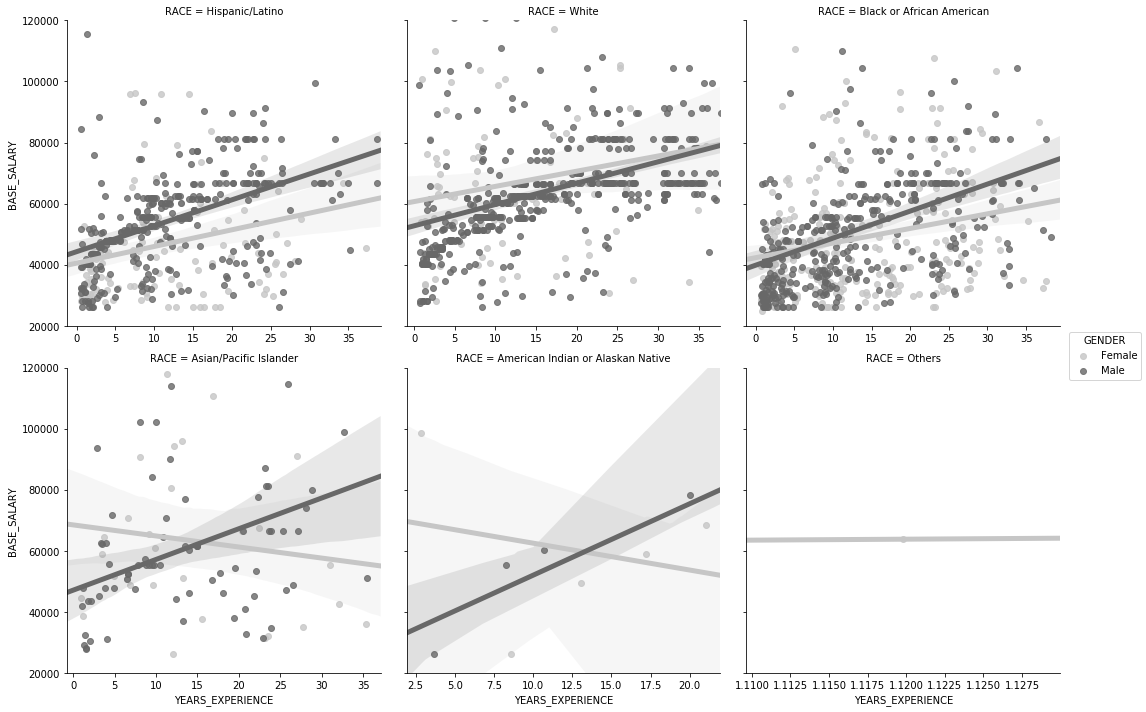

In [300]:
grid = sns.lmplot(x = 'YEARS_EXPERIENCE', y = 'BASE_SALARY', hue = 'GENDER', col = 'RACE', col_wrap = 3, palette='Greys', sharex=False, line_kws = {'linewidth': 5}, data=employee)
grid.set(ylim = (20000, 120000))

In [305]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2['DEPARTMENT'].str.extract('(HPD|HFD)', expand = True)
emp2.shape

(968, 11)

In [306]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [307]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

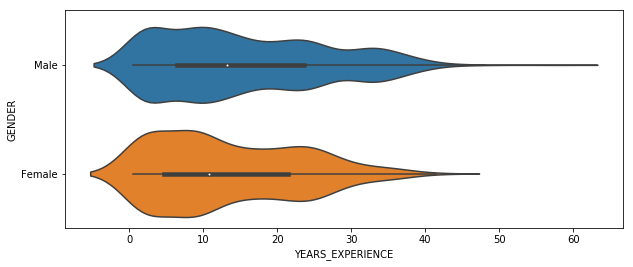

In [311]:
common_depts = employee.groupby('DEPARTMENT').filter(lambda x:len(x) > 50)
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y = 'GENDER', data =common_depts)
ax.figure.set_size_inches(10, 4)

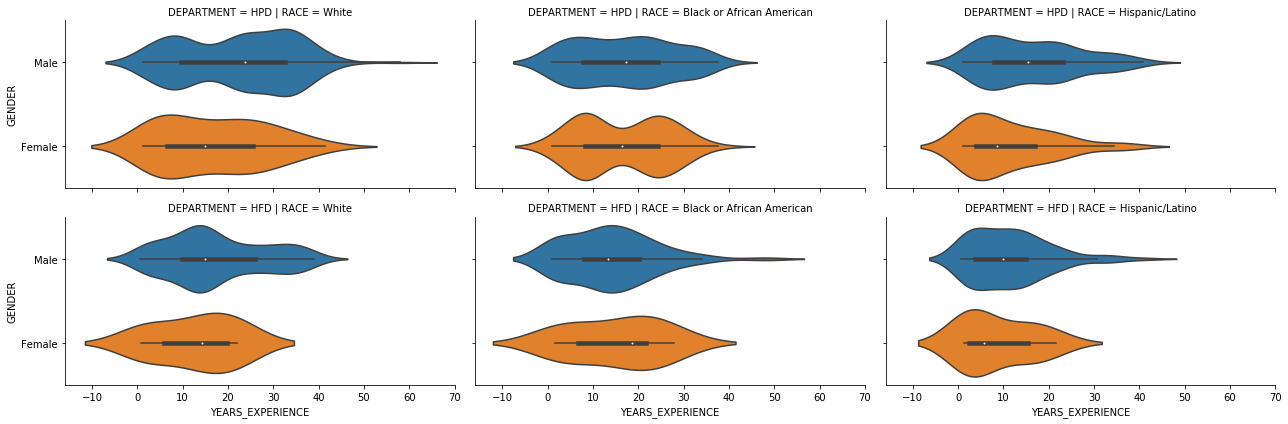

In [312]:
sns.factorplot(x = 'YEARS_EXPERIENCE', y='GENDER', col = 'RACE', row = 'DEPARTMENT', size = 3, aspect = 2, data = emp2, kind = 'violin')

### seaborn을 사용해 다이어몬드 데이터셋에 있는 심슨의 역설 발견

In [313]:
diamonds = pd.read_csv(pwd + '/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [314]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['cut'] = pd.Categorical(diamonds['cut'],categories=cut_cats, ordered=True)
diamonds['color'] = pd.Categorical(diamonds['color'],categories=color_cats, ordered=True)
diamonds['clarity'] = pd.Categorical(diamonds['clarity'],categories=clarity_cats, ordered=True)

Text(0.5,0.98,'Price Decreasing with Increasing Quality?')

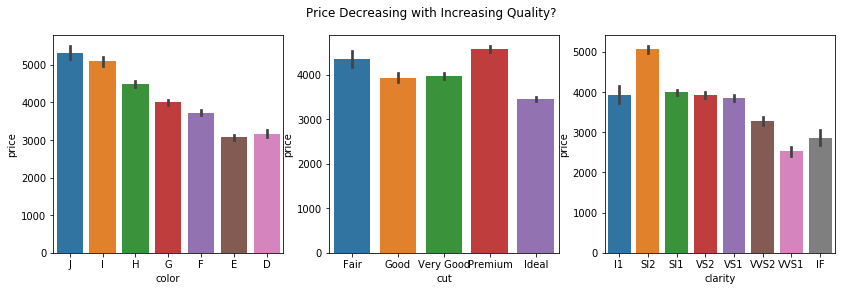

In [315]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

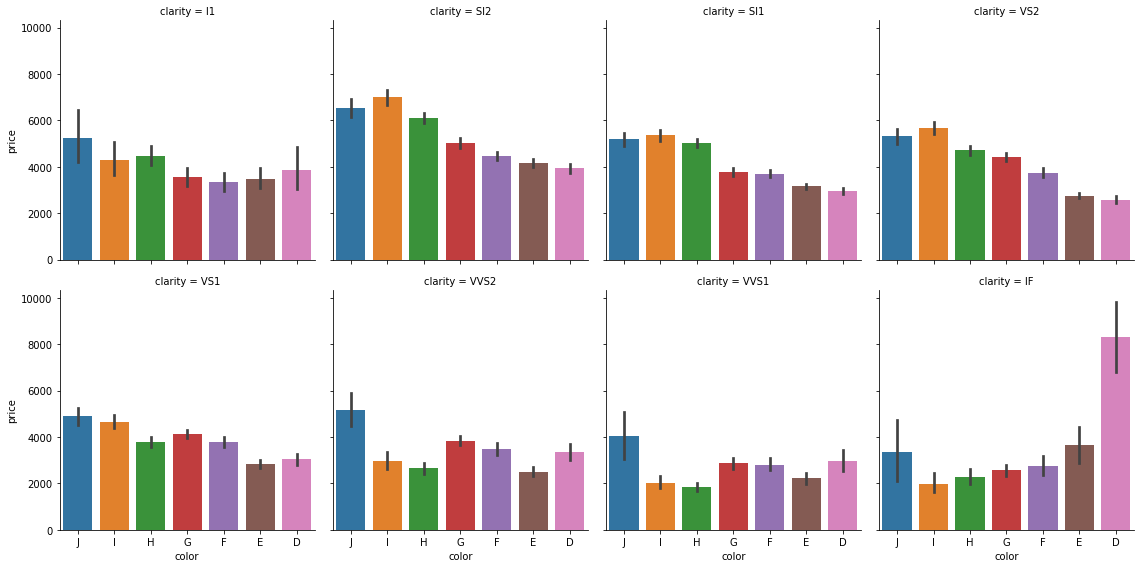

In [318]:
sns.factorplot(x='color', y='price', col='clarity', col_wrap=4, data=diamonds, kind='bar')

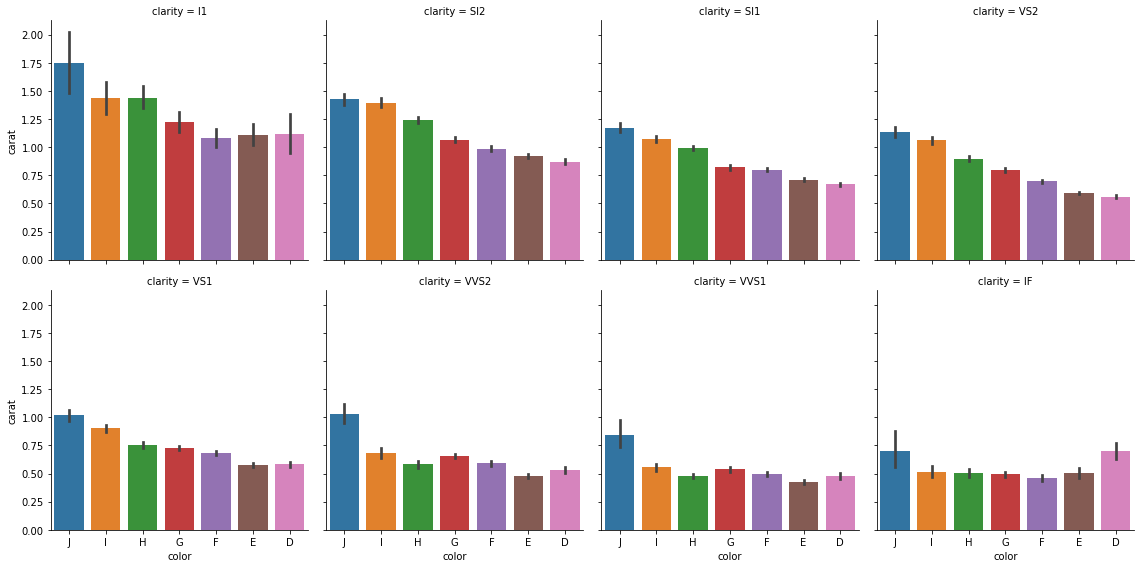

In [319]:
sns.factorplot(x='color', y='carat', col='clarity', col_wrap=4, data=diamonds, kind='bar')

Text(0.5,0.98,'Diamond size decreases with quality')

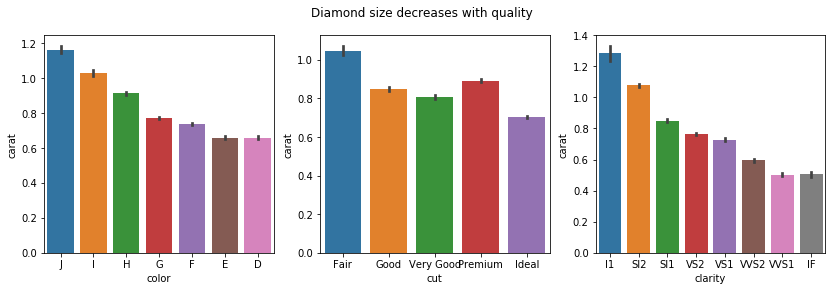

In [320]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)
fig.suptitle('Diamond size decreases with quality')

Text(0.5,1.02,'Diamond price by size, color and clarity')

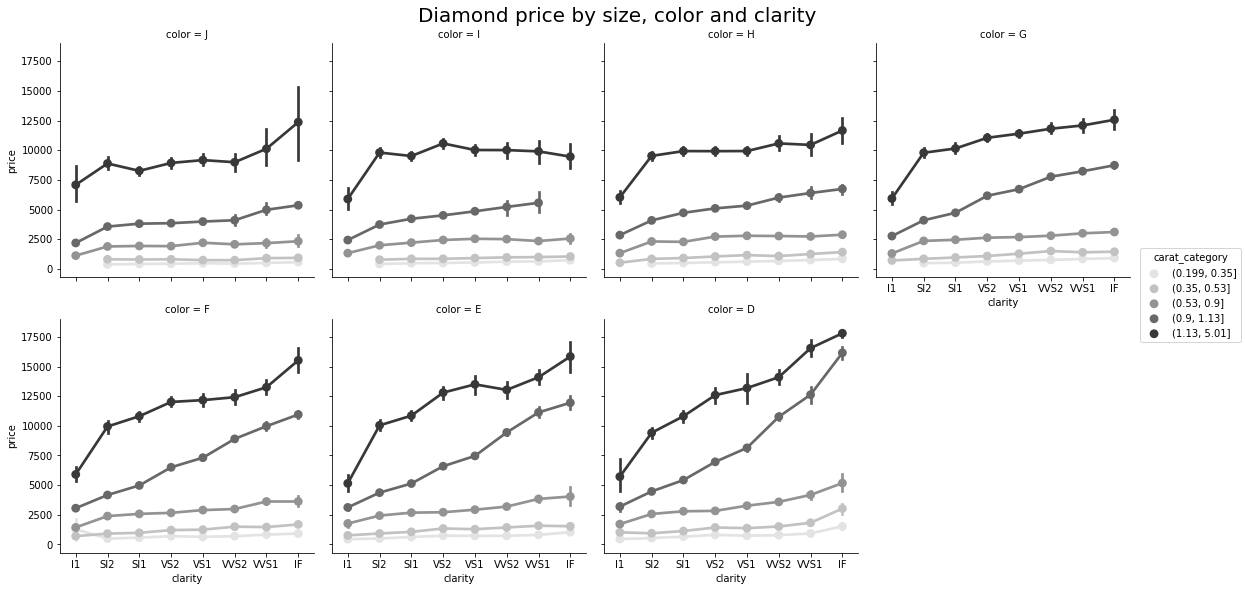

In [327]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)

from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

g = sns.factorplot(x='clarity', y='price', data=diamonds, hue='carat_category', col='color', col_wrap=4, kind='point', palette=greys)
g.fig.suptitle('Diamond price by size, color and clarity',y=1.02, size=20)

Text(0.5,1.02,'Replication of Step 3 with PairGrid')

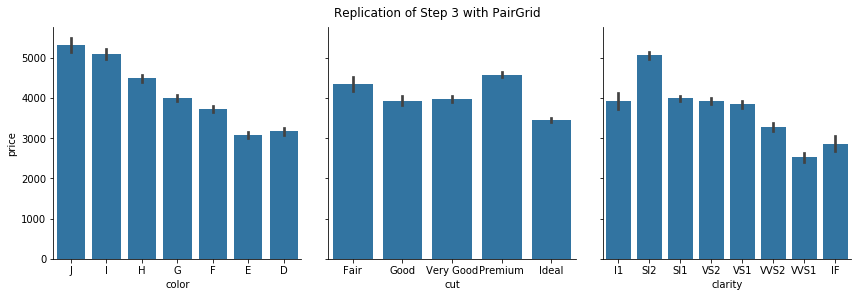

In [335]:
g = sns.PairGrid(diamonds,size=4, x_vars=["color", "cut", "clarity"], y_vars=["price"], aspect=1)
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)